In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


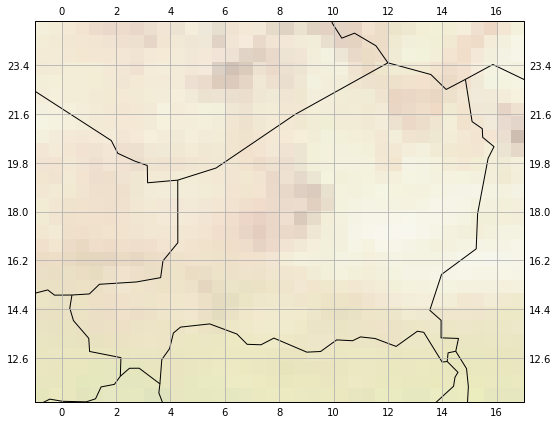

In [7]:
fig = plt.figure(figsize=(21, 7), facecolor='w', edgecolor='k')


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-1,17,11.0,25]) #[-22, -15, 63, 65])

#     ax.coastlines(resolution='50m')
#    ax.lakes()# add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.stock_img()
#     ax.bluemarble()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
 

plt.savefig(fname='./pics/map_niger.png')

plt.show()

In [44]:
# Show different spatial resolutions

from netCDF4 import Dataset #  , num2date
from eggshell.nc.nc_utils import get_variable, get_time
import numpy as np 

# file of a bbox subset
AFR22 = '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_day_20060101-20101231.nc'
# var = get_variable(AFR22)

#print 'variable name: %s' % var
ds = Dataset(AFR22)
tas22 = ds.variables['tas'] 
lats22 = ds.variables['lat']
lons22 = ds.variables['lon']

# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actually not rotated)
lon22 = lons22[0,:]
lat22 = lats22[:,0]

tas22_mean = np.squeeze(np.mean(tas22, axis=0)) # mean   30 Years 1981-2010 and transform to Celsius



In [51]:
# file of a bbox subset
AFR44 = '/home/nils/data/CORDEX/tas_AFR-44_ECMWF-ERAINT_evaluation_r1i1p1_DMI-HIRHAM5_v2_mon_199101-200012.nc'
# var = get_variable(AFR22)

#print 'variable name: %s' % var
ds = Dataset(AFR44)
tas44 = ds.variables['tas'] 
lats44 = ds.variables['lat']
lons44 = ds.variables['lon']

# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actually not rotated)
lon44 = lons44[0,:]
lat44 = lats44[:,0]

tas44_mean = np.squeeze(np.mean(tas44, axis=0)) # mean   30 Years 1981-2010 and transform to Celsius


In [55]:
# plot the maps

from matplotlib import pyplot as plt
# from cartopy import config
# from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline

cmap='prism'
extent=(0,17,11.0,24)

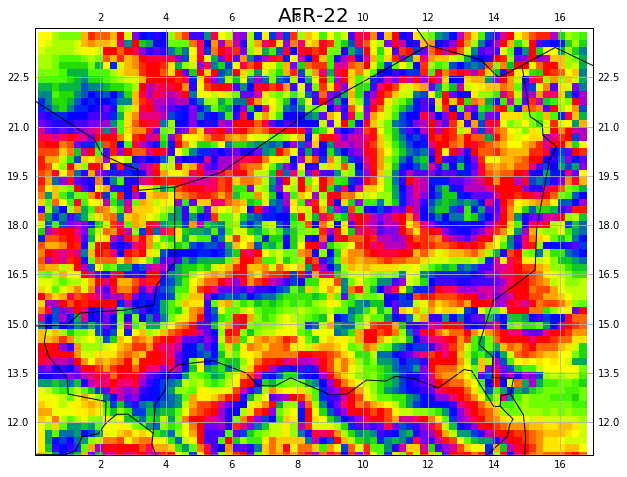

In [56]:
fig = plt.figure(figsize=(10,10 ), facecolor='w', edgecolor='k')
lons22, lats22 = meshgrid(lon22, lat22)

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('AFR-22', fontsize=20)

cs = plt.pcolormesh(lons22, lats22, tas22_mean, transform=ccrs.PlateCarree(), cmap=cmap)
# plt.colorbar(cs)

plt.savefig(fname='./pics/AFR-22.png')

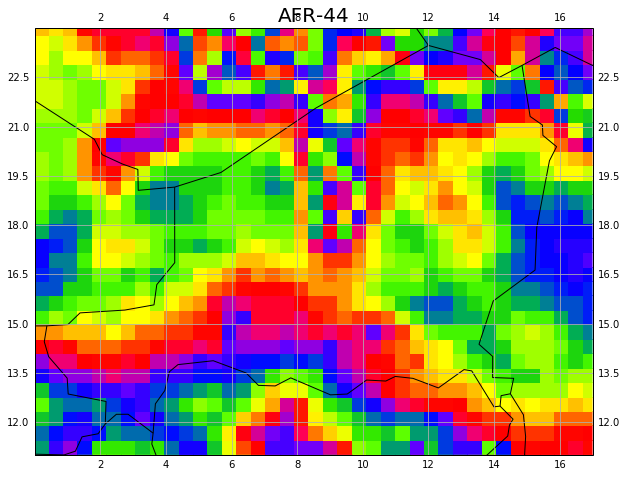

In [53]:
fig = plt.figure(figsize=(10,10 ), facecolor='w', edgecolor='k')
lons44, lats44 = meshgrid(lon44, lat44)

ax = plt.axes(projection=ccrs.PlateCarree())

extent=(0,17,11.0,24)
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('AFR-44', fontsize=20)

cs = plt.pcolormesh(lons44, lats44, tas44_mean, transform=ccrs.PlateCarree(), cmap=cmap)
# plt.colorbar(cs)

plt.savefig(fname='./pics/AFR-44.png')

In [64]:
# file of a bbox subset
CMIP5 = '/home/nils/data/CMIP5/huss_day_HadGEM2-ES_esmControl_r1i1p1_20291201-20391130.nc'
# var = get_variable(AFR22)

#print 'variable name: %s' % var
ds = Dataset(CMIP5)
tasC5 = ds.variables['huss'] 
latC5 = ds.variables['lat']
lonC5 = ds.variables['lon']

# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actually not rotated)
# lon44 = lons44[0,:]
# lat44 = lats44[:,0]

tasC5_mean = np.squeeze(np.mean(tasC5, axis=0)) # mean   30 Years 1981-2010 and transform to Celsius


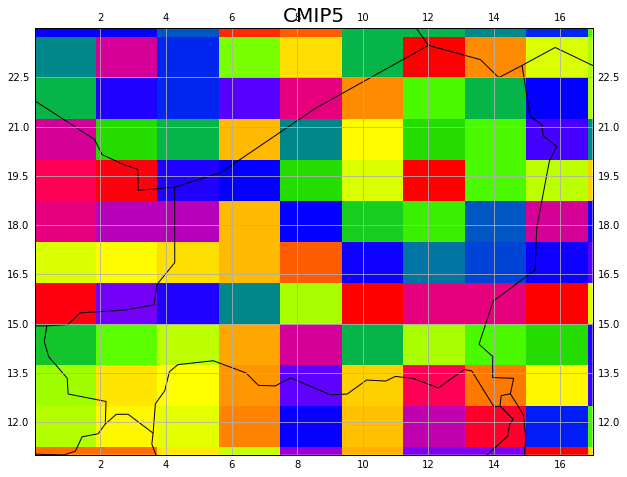

In [65]:
fig = plt.figure(figsize=(10,10 ), facecolor='w', edgecolor='k')
lonsC5, latsC5 = meshgrid(lonC5, latC5)

ax = plt.axes(projection=ccrs.PlateCarree())

extent=(0,17,11.0,24)
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('CMIP5', fontsize=20)

cs = plt.pcolormesh(lonsC5, latsC5, tasC5_mean, transform=ccrs.PlateCarree(), cmap=cmap)
# plt.colorbar(cs)

plt.savefig(fname='./pics/CMIP5.png')